Revisit the Reuters C50 text corpus that we briefly explored in class. Your task is simple: tell an interesting story, anchored in some analytical tools we have learned in this class, using this data. For example:

you could cluster authors or documents and tell a story about what you find.
you could look for common factors using PCA.
you could train a predictive model and assess its accuracy, constructing features for each document that maximize performance.
you could do anything else that strikes you as interesting with this data.
Describe clearly what question you are trying to answer, what models you are using, how you pre-processed the data, and so forth. Make sure you include at least one really interesting plot (although more than one might be necessary, depending on your question and approach.)

Format your write-up in the following sections, some of which might be quite short:

Question: What question(s) are you trying to answer?
Approach: What approach/statistical tool did you use to answer the questions?
Results: What evidence/results did your approach provide to answer the questions? (E.g. any numbers, tables, figures as appropriate.)
Conclusion: What are your conclusions about your questions? Provide a written interpretation of your results, understandable to stakeholders who might plausibly take an interest in this data set.
Regarding the data itself: In the C50train directory, you have 50 articles from each of 50 different authors (one author per directory). Then in the C50test directory, you have another 50 articles from each of those same 50 authors (again, one author per directory). This train/test split is obviously intended for building predictive models, but to repeat, you need not do that on this problem. You can tell any story you want using any methods you want. Just make it compelling!

Note: if you try to build a predictive model, you will need to figure out a way to deal with words in the test set that you never saw in the training set. This is a nontrivial aspect of the modeling exercise. (E.g. you might simply ignore those new words.)

This question will be graded according to three criteria:

the overall "interesting-ness" of your question and analysis.
the clarity of your description. We will be asking ourselves: could your analysis be reproduced by a competent data scientist based on what you've said? (That's good.) Or would that person have to wade into the code in order to understand what, precisely, you've done? (That's bad.)
technical correctness (i.e. did you make any mistakes in execution or interpretation?)

<Figure size 1400x1000 with 0 Axes>

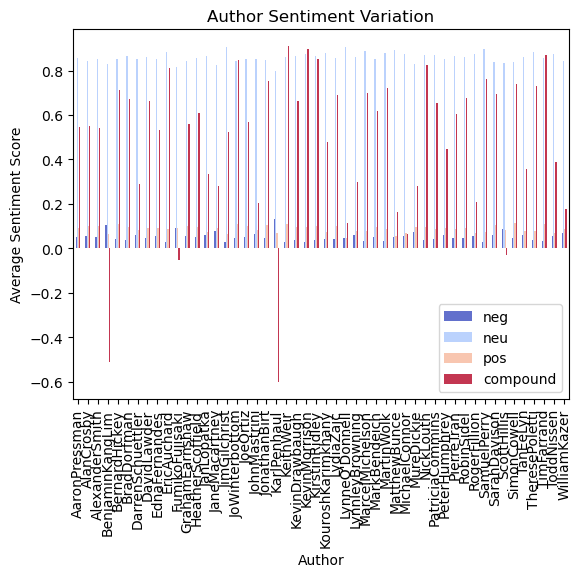

In [10]:
import os
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Data paths
train_path = "Reuters/C50train"
test_path = "Reuters/C50test"

# Function to load articles from a given path
def load_articles_from_path(path):
    corpus = []
    author_names = []
    for author in os.listdir(path):
        author_path = os.path.join(path, author)
        articles = [os.path.join(author_path, article) for article in os.listdir(author_path)]
        author_names.extend([author] * len(articles))
        corpus.extend(articles)
    return corpus, author_names

# Load training and test data
train_corpus, train_author_names = load_articles_from_path(train_path)
test_corpus, test_author_names = load_articles_from_path(test_path)

# Combine training and test data for analysis (optional)
corpus = train_corpus + test_corpus

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each article
sentiments = []
for article_path in corpus:
    article_text = open(article_path, 'r').read()
    sentiment_scores = sia.polarity_scores(article_text)
    sentiments.append(sentiment_scores)

# Create a DataFrame with sentiment scores and author names
sentiments_df = pd.DataFrame(sentiments)
sentiments_df['Author'] = train_author_names + test_author_names

# Calculate average sentiment scores per author
average_sentiments = sentiments_df.groupby('Author').mean()

# Plot sentiment scores
plt.figure(figsize=(14, 10))
average_sentiments.plot(kind='bar', colormap='coolwarm', alpha=0.8)
plt.xlabel('Author')
plt.ylabel('Average Sentiment Score')
plt.title('Author Sentiment Variation')
plt.xticks(rotation=90)
plt.show()


<Figure size 1400x1000 with 0 Axes>

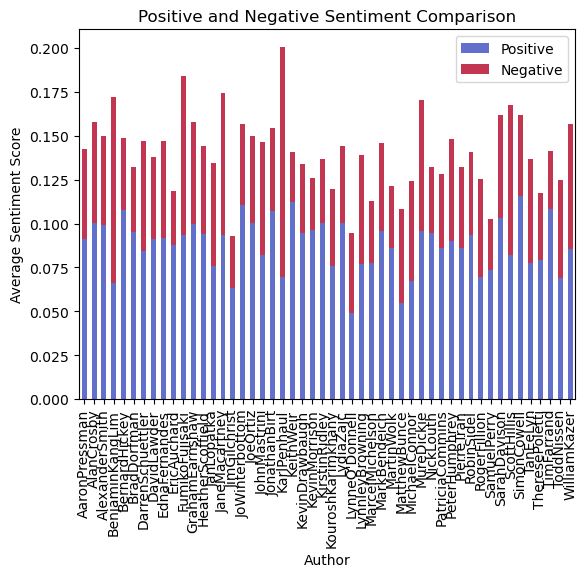

In [11]:
# Calculate average sentiment scores per author
average_sentiments = sentiments_df.groupby('Author').mean()

# Plot sentiment scores without neutral sentiment
plt.figure(figsize=(14, 10))
average_sentiments[['pos', 'neg']].plot(kind='bar', stacked=True, colormap='coolwarm', alpha=0.8)
plt.xlabel('Author')
plt.ylabel('Average Sentiment Score')
plt.title('Positive and Negative Sentiment Comparison')
plt.xticks(rotation=90)
plt.legend(['Positive', 'Negative'])
plt.show()


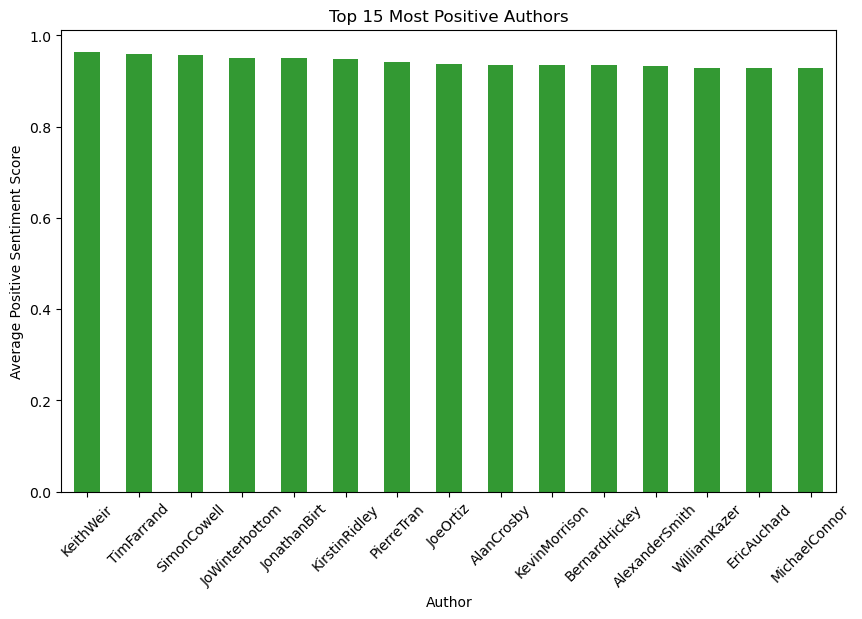

In [9]:
# Calculate the mean positive sentiment scores for each author
positive_sentiments = sentiments_df[sentiments_df['compound'] > 0].groupby('Author').mean()

# Sort authors by mean positive sentiment scores and select top 15
top_positive_authors = positive_sentiments['compound'].sort_values(ascending=False).head(15)

# Plot the top 10 most positive authors
plt.figure(figsize=(10, 6))
top_positive_authors.plot(kind='bar', color='green', alpha=0.8)
plt.xlabel('Author')
plt.ylabel('Average Positive Sentiment Score')
plt.title('Top 15 Most Positive Authors')
plt.xticks(rotation=45)
plt.show()


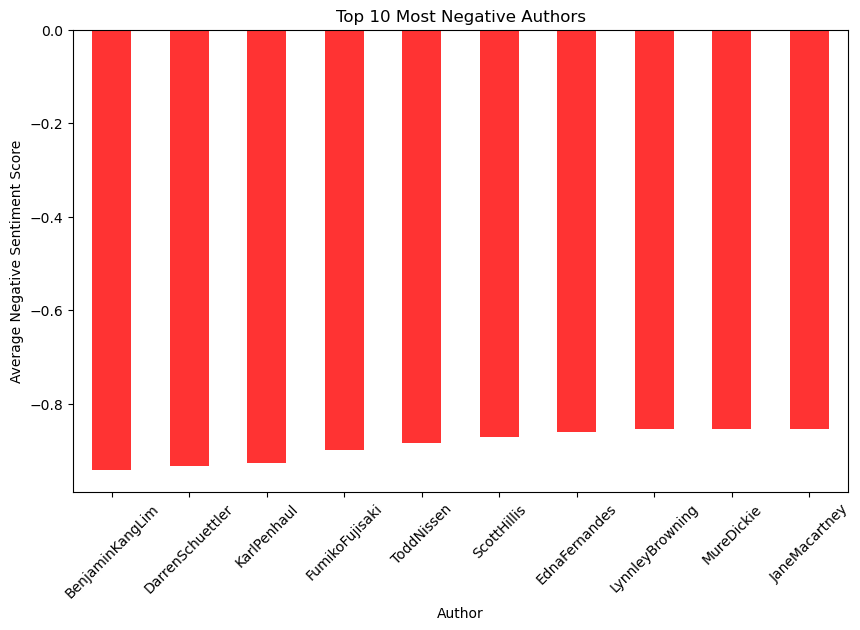

In [4]:
# Calculate the mean negative sentiment scores for each author
negative_sentiments = sentiments_df[sentiments_df['compound'] < 0].groupby('Author').mean()

# Sort authors by mean negative sentiment scores and select top 10
top_negative_authors = negative_sentiments['compound'].sort_values(ascending=True).head(10)

# Plot the top 10 most negative authors
plt.figure(figsize=(10, 6))
top_negative_authors.plot(kind='bar', color='red', alpha=0.8)
plt.xlabel('Author')
plt.ylabel('Average Negative Sentiment Score')
plt.title('Top 10 Most Negative Authors')
plt.xticks(rotation=45)
plt.show()


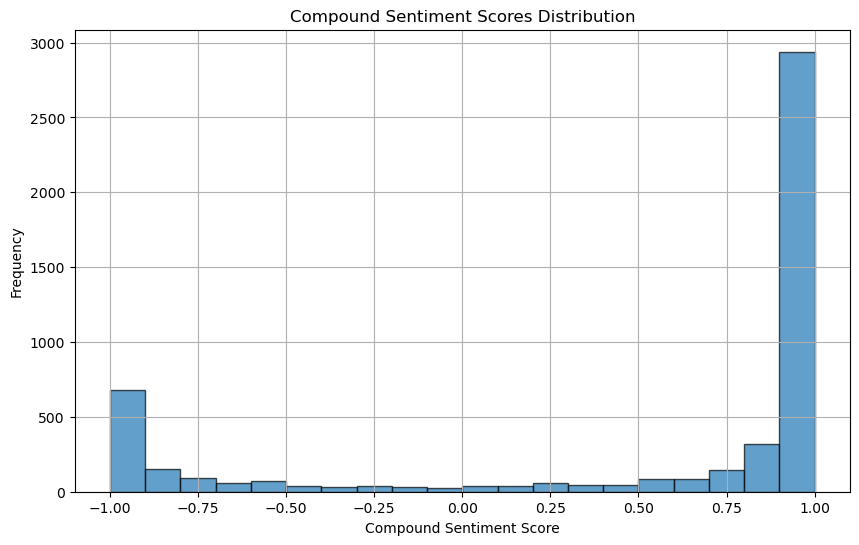

In [12]:
import os
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load and preprocess data as you did before

# Create a histogram of compound sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(sentiments_df['compound'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Compound Sentiment Scores Distribution')
plt.grid(True)
plt.show()


Question: Using the Reuters Corpus dataset, we wanted to explore the sentiment scores of the varying authors and compare the distribution of sentiment scores amongst them. 

Approach: Our approach began with Exploratory Data Analysis, where we utilized Sentiment Intensity Analyzer (SIA) to evaluate sentiment scores of articles in both the training and test sets. From there, we had a visualization of the sentiment scores of the 50 authors. This analysis encompassed the visualization of sentiment trends among authors, identification of authors with prominent positive and negative sentiments, and examination of overall sentiment tendencies captured by the author's compound score.

Results: We drafted five models to display information about the Reuters dataset

    -Author Sentiment Variation: This was our initial data manipulation where we modeled the positive, negative, neutral, and compound scores of the authors sentiment in their articles. Due to the large sample size of 50, the graph is not as readable as it ideally could be.
    -Positive and Negative Sentiment Comparison: This reduced the data to just positive and negative scores to produce a more readable graph. This displays the sum of their positive and negative sentimentsl, depicting whether they were more skewed towards one sentiment or more evenly split.
    -Top Postive Authors: Identifies the top 15 authors with the highest average positive sentiment scores, showcasing those consistently conveying positivity in their writing.
    -Top Negative Authors: Highlights the top 10 authors with the lowest average positive sentiment scores, indicating authors with a tendency towards negative writing. Both of these models utilized compound, a metric of overal sentiment, with low score representing negativity, high scores representing positivity, and middling scores representing neutrality
    -Sentiment Score Distribution: This histogram of compound sentiment scores provides a comprehensive perspective on the overall sentiment distribution. This graph shows that a majority of articles have a positive sentiment score, with a notable proportion being strongly negative, while comparatively few rate in the neutral status. 

Conclusion: Overall, this exercise provides evidence that a majority of articles written will have a high positive sentiment score, but there are specific authors such as Benjamin Kang Lim, Darren Schuettler, and Karl Penhaul who have strong tendency towards negative writings. Additionally, the Top 15 Positive Authors Graph shows that all 15 have near equal scores strongly portraying them as Positive. This reinforces our Sentiment Score Histogram showing a strong majority of articles being positive, likely heavily contributed by positive authors such as Keith Weir, Tim Farrand, and Simon Cowell. In conclusion, we aimed to answer our initial question of wanting to explore the distribution of sentiments in the writings of the Reuters Corpus dataset, and found that there is a large proportion of positive articles, a noteworthy section of negative articles, and a minor portion of them falling within the range of neutrality. 